In [ ]:
# import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional

In [ ]:
data_path = 'Womens Clothing E-Commerce Reviews.csv'

data = pd.read_csv(data_path).head(1000)
data.head()


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,910.282000,43.502000,4.194000,0.818000,2.614000
std,288.819436,198.919762,12.357374,1.080524,0.386038,5.700131
min,0.000000,2.000000,20.000000,1.000000,0.000000,0.000000
25%,249.750000,850.000000,35.000000,4.000000,1.000000,0.000000
50%,499.500000,907.000000,41.000000,5.000000,1.000000,1.000000
75%,749.250000,1060.000000,52.000000,5.000000,1.000000,3.000000
max,999.000000,1196.000000,93.000000,5.000000,1.000000,84.000000


In [ ]:
print(data.describe(include='all'))


         Unnamed: 0  Clothing ID          Age Title  \
count   1000.000000  1000.000000  1000.000000   810   
unique          NaN          NaN          NaN   743   
top             NaN          NaN          NaN  Love   
freq            NaN          NaN          NaN     7   
mean     499.500000   910.282000    43.502000   NaN   
std      288.819436   198.919762    12.357374   NaN   
min        0.000000     2.000000    20.000000   NaN   
25%      249.750000   850.000000    35.000000   NaN   
50%      499.500000   907.000000    41.000000   NaN   
75%      749.250000  1060.000000    52.000000   NaN   
max      999.000000  1196.000000    93.000000   NaN   

                                              Review Text       Rating  \
count                                                 958  1000.000000   
unique                                                958          NaN   
top     Absolutely wonderful - silky and sexy and comf...          NaN   
freq                                       

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1000 non-null   int64 
 1   Clothing ID              1000 non-null   int64 
 2   Age                      1000 non-null   int64 
 3   Title                    810 non-null    object
 4   Review Text              958 non-null    object
 5   Rating                   1000 non-null   int64 
 6   Recommended IND          1000 non-null   int64 
 7   Positive Feedback Count  1000 non-null   int64 
 8   Division Name            1000 non-null   object
 9   Department Name          1000 non-null   object
 10  Class Name               1000 non-null   object
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


In [ ]:
data['Review'] = data['Title'] + ' ' + data['Review Text']
data = data.drop(labels=['Title','Review Text'] , axis=1)
data.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
0,0,767,33,4,1,0,Initmates,Intimate,Intimates,NaN
1,1,1080,34,5,1,4,General,Dresses,Dresses,NaN
2,2,1077,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,3,1049,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,4,847,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


In [ ]:
#detect missing values in datafarme
data.Review.isna().sum()

190

In [ ]:
#drop the null values
data.dropna(inplace=True)
data.head()
print("After dropping NaN text_df: ",data.shape)

After dropping NaN text_df:  (810, 10)


In [ ]:
sentences = data['Review'].astype(str).str.lower()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1
print(total_words)
tokenized_sentences = tokenizer.texts_to_sequences(data['Review'].astype(str))


3573


In [ ]:
tf.keras.backend.clear_session()

input_sequences = []
for line in tokenized_sentences:
	for i in range(1, len(line)):
		n_gram_sequence = line[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2)

# Now you can use x_train and y_train to train your model
# And use x_test and y_test to evaluate your model


In [ ]:
#Hyperparameters
vocab_size = 10000
embedding_dim = 64


model2 = Sequential()
model2.add(Embedding(total_words, embedding_dim, input_length=max_sequence_len-1))
model2.add(Bidirectional(LSTM(250)))
model2.add(Dense(total_words/2, activation='relu'))
model2.add(Dense(total_words, activation='softmax'))

adam = Adam(learning_rate=0.001)

model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])



print(model2.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 115, 64)           228672    
                                                                 
 bidirectional (Bidirection  (None, 500)               630000    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1786)              894786    
                                                                 
 dense_1 (Dense)             (None, 3573)              6384951   
                                                                 
Total params: 8138409 (31.05 MB)
Trainable params: 8138409 (31.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history = model2.fit(x_train, y_train, epochs=20, verbose=1)

Epoch 1/20
1331/1331 [==============================] - 981s 731ms/step - loss: 5.9431 - accuracy: 0.0641
Epoch 2/20
1331/1331 [==============================] - 960s 721ms/step - loss: 5.3144 - accuracy: 0.1198
Epoch 3/20
1331/1331 [==============================] - 955s 717ms/step - loss: 4.8316 - accuracy: 0.1518
Epoch 4/20
1331/1331 [==============================] - 961s 722ms/step - loss: 4.4851 - accuracy: 0.1726
Epoch 5/20
1331/1331 [==============================] - 967s 726ms/step - loss: 4.1902 - accuracy: 0.1901
Epoch 6/20
1331/1331 [==============================] - 959s 721ms/step - loss: 3.9034 - accuracy: 0.2121
Epoch 7/20
1331/1331 [==============================] - 967s 726ms/step - loss: 3.6107 - accuracy: 0.2366
Epoch 8/20
1331/1331 [==============================] - 974s 732ms/step - loss: 3.2867 - accuracy: 0.2645
Epoch 9/20
1331/1331 [==============================] - 966s 726ms/step - loss: 2.9235 - accuracy: 0.3095
Epoch 10/20
1331/1331 [=======================

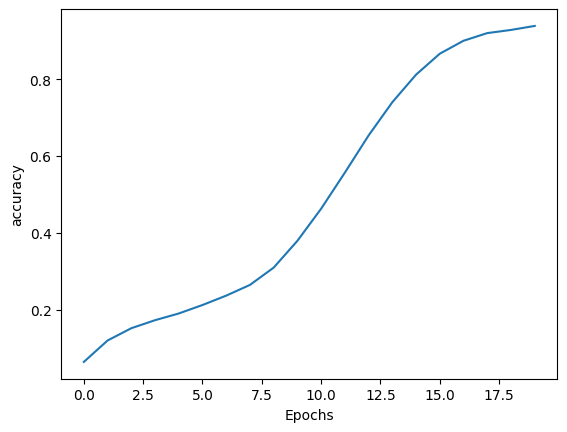

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()


plot_graphs(history, 'accuracy')

In [ ]:
# Evaluate the trained model on the test data
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy
print('Test accuracy:', test_acc)


Test accuracy: 0.12128899246454239


In [ ]:
def complete_this_paragraph(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        #predicted = model.predict_classes(token_list, verbose=0)
        predicted = np.argmax(model2.predict(token_list, verbose=0), axis=-1)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [ ]:
complete_this_paragraph("this is a good", 40)


"this is a good top with nice super comfy and comfortable i am 5'4 105 lbs and bought the m l because of how beautiful they are quite stiff the proportions in the back that you can also size up i wait for it"

In [ ]:
complete_this_paragraph("This shirt is so", 40)

"This shirt is so much on i have anything like it i was so excited to buy this top online but you're happy with the fit i'm usually a size but i am 5'5 135 pounds and the size 10 fit quite a little"